# VacationPy

In [1]:
# Dependencies and setup
import pandas as pd
import requests
import plotly.express as px

# Import API key
from api_keys import g_key
from api_keys import m_key

# Set mapbox token
px.set_mapbox_access_token(m_key)

In [2]:
# Import data saved as a csv file in Part I (WeatherPy)
city_weather_data = pd.read_csv("output_data/cities.csv", index_col=0)
city_weather_data

,City,Latitude,Longitude,Country,Wind Speed,Max Temp,Humidity,Cloudiness,Date
City_ID,,,,,,,,,
0,honiara,-9.43,159.95,SB,12.75,87.80,62,40,1601166207
1,san vicente de canete,-13.08,-76.38,PE,3.87,61.05,80,12,1601166207
2,klaksvik,62.23,-6.59,FO,11.41,44.60,87,100,1601166207
3,kysyl-syr,63.90,122.76,RU,6.33,47.34,91,100,1601166207
4,haines junction,60.75,-137.51,CA,7.20,49.55,65,88,1601166182
...,...,...,...,...,...,...,...,...,...
565,nago,26.59,127.98,JP,3.36,71.60,88,90,1601166337
566,delta,5.50,6.00,NG,1.81,73.17,96,100,1601166337
567,maldonado,-34.67,-54.92,UY,4.70,62.60,88,75,1601166110


In [3]:
# Create new dataframe fitting weather criteria of choice

df = city_weather_data.loc[(city_weather_data["Max Temp"] < 80) & (city_weather_data["Max Temp"] > 70) \
                                  & (city_weather_data["Wind Speed"] < 10) \
                                  & (city_weather_data["Cloudiness"] == 0)].dropna()

df

,City,Latitude,Longitude,Country,Wind Speed,Max Temp,Humidity,Cloudiness,Date
City_ID,,,,,,,,,
33,amambai,-23.10,-55.23,BR,5.64,79.83,35,0,1601166214
141,marsa matruh,31.35,27.25,EG,6.93,75.20,73,0,1601166239
152,riyadh,24.69,46.72,SA,2.24,78.80,29,0,1601166231
153,gat,31.61,34.76,IL,5.73,75.99,74,0,1601166242
227,gorele,41.03,39.00,TR,2.24,71.60,64,0,1601166259
247,sakakah,29.97,40.21,SA,9.17,77.00,27,0,1601166264
261,victoria point,-27.58,153.30,AU,1.99,71.01,26,0,1601166267
326,thyolo,-16.07,35.14,MW,7.76,72.03,33,0,1601166282
342,senhor do bonfim,-10.46,-40.19,BR,9.69,72.72,57,0,1601166285


In [4]:
# # Adding new blank column to dataframe to add hotel names and each of their lat-longs.
# df["Hotel Name"] = ""
# df

In [5]:
# Create lat/long string for API calls abd add to dataframe
df["City_Lat_Lng"] = df["Latitude"].astype(str) + "," + df["Longitude"].astype(str)

# Create list
city_lat_lng = df["City_Lat_Lng"] .tolist()

In [6]:
hotels = requests.get("https://maps.googleapis.com/maps/api/place/nearbysearch/json", params={
    "location": city_lat_lng, 
    "keyword": "hotel", 
    "type": "hotel", 
    "radius": 5000, 
    "key": g_key
}).json()

In [7]:
hotels["results"][0]

{'business_status': 'OPERATIONAL',
 'geometry': {'location': {'lat': -23.1048301, 'lng': -55.22182},
  'viewport': {'northeast': {'lat': -23.10357337010727,
    'lng': -55.22041962010729},
   'southwest': {'lat': -23.10627302989272, 'lng': -55.22311927989273}}},
 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/lodging-71.png',
 'name': 'Hotel Royal em Amambai',
 'opening_hours': {'open_now': True},
 'photos': [{'height': 3024,
   'html_attributions': ['<a href="https://maps.google.com/maps/contrib/111332270340341938624">A Google User</a>'],
   'photo_reference': 'CmRaAAAA4KEwEZHsNwvcP5aH6tV7LH-VRz-paW6OEWmPe59VHedOmABFHefYTu4IIbFnaJ9iikB_XX0we1kVI0wXO2w3qZKMsVUP0i0U7MtVox0iF4dW6M_sM5sbrfpLmYmLRNl7EhD4Y6GaNPhRjKySxozvglJqGhSayVMYv0Tbj4DBGmVui6dDSlpR3Q',
   'width': 4032}],
 'place_id': 'ChIJbcOlTbMXipQR3sOg8Sna5L0',
 'plus_code': {'compound_code': 'VQWH+37 Amambai, State of Mato Grosso do Sul, Brazil',
  'global_code': '5886VQWH+37'},
 'rating': 4.8,
 'reference': 'ChIJbcOlTb

In [8]:
# Function to extract data
def extract_data(data):
        data = data["results"][0]
        return {
            "Hotel Name" : data["name"],
            "Hotel Latitude" : data["geometry"]["location"]["lat"],
            "Hotel Longitude" : data["geometry"]["location"]["lng"]
        }

In [9]:
# Request data from Google Places api

hotel_locs = []

# Print header to indicate beginning of data retrieval
print("--------BEGINNING DATA RETRIEVAL--------")  
print("------------------------------------------------------------------------")

# Counter for output
record = 1

for coordinates in city_lat_lng:
    
    try: 
        print(f"Processing Record {record} | {coordinates}")
        
        record += 1
        
        output = requests.get("https://maps.googleapis.com/maps/api/place/nearbysearch/json", params={
                "location": coordinates, 
                "keyword": "hotel", 
                "type": "hotel", 
                "radius": 5000, 
                "key": g_key
        }).json()
        
        hotel_loc = extract_data(output)
        hotel_locs.append(hotel_loc)
    
    except:
        print("Sorry, could not locate a hotel within provided radius of city location!")
        pass
        
    print("------------------------------------------------------------------------")
print("--------SEARCH COMPLETE--------")

--------BEGINNING DATA RETRIEVAL--------
------------------------------------------------------------------------
Processing Record 1 | -23.1,-55.23
------------------------------------------------------------------------
Processing Record 2 | 31.35,27.25
------------------------------------------------------------------------
Processing Record 3 | 24.69,46.72
------------------------------------------------------------------------
Processing Record 4 | 31.61,34.76
------------------------------------------------------------------------
Processing Record 5 | 41.03,39.0
Sorry, could not locate a hotel within provided radius of city location!
------------------------------------------------------------------------
Processing Record 6 | 29.97,40.21
------------------------------------------------------------------------
Processing Record 7 | -27.58,153.3
------------------------------------------------------------------------
Processing Record 8 | -16.07,35.14
----------------------------

In [10]:
hotel_df = pd.DataFrame(hotel_locs)
hotel_df

,Hotel Name,Hotel Latitude,Hotel Longitude
0,Hotel Royal em Amambai,-23.104830,-55.221820
1,Jewel Matrouh Hotel,31.360085,27.222614
2,ibis Riyadh Olaya Street,24.711981,46.676870
3,Desert Gat,31.603043,34.763726
4,Raoum Inn Hotel,29.945274,40.181156
5,Cleveland Visitor Villas Motel,-27.532994,153.266890
6,Chawani Bungalow,-16.053739,35.112292
7,NOVOLESTE Hotel,-10.459476,-40.188150
8,Pousada Villa das Pedras - Hotel in Pirenópoli...,-15.873014,-48.936152
9,Mövenpick Hotel Qassim,26.357830,43.967881


In [11]:
# Data prep for combined dataframe

# Round off lat-longs for consistency
df = df.round({"Latitude": 0, "Longitude": 0})
hotel_df = hotel_df.round({"Hotel Latitude": 0, "Hotel Longitude": 0})

# Add hotel data to main city dataframe
city_hotel_df = pd.merge(hotel_df, df, how="left", left_on=["Hotel Latitude", "Hotel Longitude"], right_on=["Latitude", "Longitude"])
city_hotel_df

,Hotel Name,Hotel Latitude,Hotel Longitude,City,Latitude,Longitude,Country,Wind Speed,Max Temp,Humidity,Cloudiness,Date,City_Lat_Lng
0,Hotel Royal em Amambai,-23.0,-55.0,amambai,-23.0,-55.0,BR,5.64,79.83,35,0,1601166214,"-23.1,-55.23"
1,Jewel Matrouh Hotel,31.0,27.0,marsa matruh,31.0,27.0,EG,6.93,75.20,73,0,1601166239,"31.35,27.25"
2,ibis Riyadh Olaya Street,25.0,47.0,riyadh,25.0,47.0,SA,2.24,78.80,29,0,1601166231,"24.69,46.72"
3,Desert Gat,32.0,35.0,gat,32.0,35.0,IL,5.73,75.99,74,0,1601166242,"31.61,34.76"
4,Raoum Inn Hotel,30.0,40.0,sakakah,30.0,40.0,SA,9.17,77.00,27,0,1601166264,"29.97,40.21"
5,Cleveland Visitor Villas Motel,-28.0,153.0,victoria point,-28.0,153.0,AU,1.99,71.01,26,0,1601166267,"-27.58,153.3"
6,Chawani Bungalow,-16.0,35.0,thyolo,-16.0,35.0,MW,7.76,72.03,33,0,1601166282,"-16.07,35.14"
7,NOVOLESTE Hotel,-10.0,-40.0,senhor do bonfim,-10.0,-40.0,BR,9.69,72.72,57,0,1601166285,"-10.46,-40.19"
8,Pousada Villa das Pedras - Hotel in Pirenópoli...,-16.0,-49.0,pirenopolis,-16.0,-49.0,BR,3.80,71.60,43,0,1601166295,"-15.85,-48.96"
9,Mövenpick Hotel Qassim,26.0,44.0,buraydah,26.0,44.0,SA,5.82,78.80,29,0,1601166057,"26.33,43.98"


In [12]:
# Clean dataframe by choosing only data relevant for plotting

final_df = city_hotel_df[["City", "Country", "Hotel Name", "Hotel Latitude", "Hotel Longitude", "Humidity"]]
final_df

,City,Country,Hotel Name,Hotel Latitude,Hotel Longitude,Humidity
0,amambai,BR,Hotel Royal em Amambai,-23.0,-55.0,35
1,marsa matruh,EG,Jewel Matrouh Hotel,31.0,27.0,73
2,riyadh,SA,ibis Riyadh Olaya Street,25.0,47.0,29
3,gat,IL,Desert Gat,32.0,35.0,74
4,sakakah,SA,Raoum Inn Hotel,30.0,40.0,27
5,victoria point,AU,Cleveland Visitor Villas Motel,-28.0,153.0,26
6,thyolo,MW,Chawani Bungalow,-16.0,35.0,33
7,senhor do bonfim,BR,NOVOLESTE Hotel,-10.0,-40.0,57
8,pirenopolis,BR,Pousada Villa das Pedras - Hotel in Pirenópoli...,-16.0,-49.0,43
9,buraydah,SA,Mövenpick Hotel Qassim,26.0,44.0,29


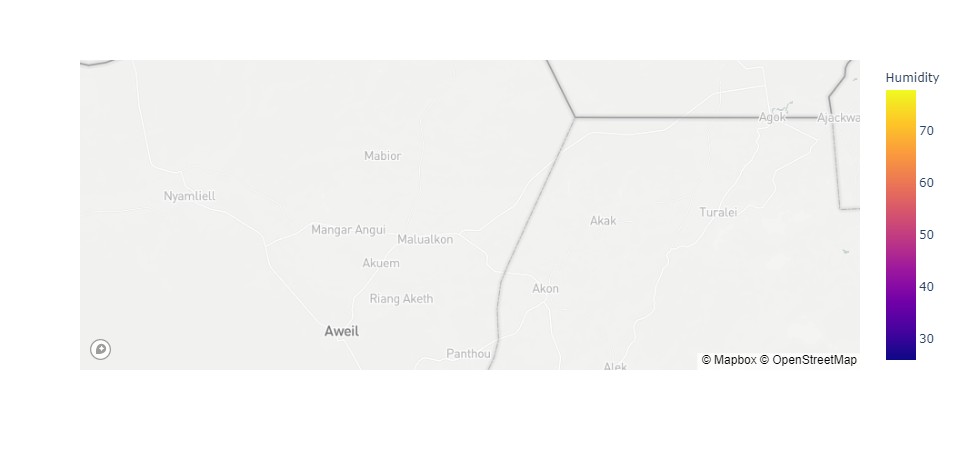

In [14]:
map = px.scatter_mapbox(final_df, lat="Hotel Latitude", lon="Hotel Longitude", color="Humidity", hover_data=[
    "City",
    "Country",
    "Hotel Name",
    "Hotel Latitude",
    "Hotel Longitude",
    "Humidity"
])

map.show()

##### Map above shows hotel recommendations for 12 cities that would have ideal weather for vacationers (as defined), color coded by humidity levels at each location.